In [2]:
# imports
import os
import matplotlib.pyplot as plt
import helpers as h # contains the computations
import numpy as np
import pandas as pd
import json

# read in the files from data directory

left_file_path_1 = "../shared_data/hifim/sub_2/5_springs/5-springs_Left-Ankle.csv"
right_file_path_1 = "../shared_data/hifim/sub_2/5_springs/5-springs_Right-Ankle.csv"

# reads the csv into a pandas data frame
left_data_1 = pd.read_csv(left_file_path_1)
right_data_1 = pd.read_csv(right_file_path_1)

In [3]:
l_pc_1 =  left_data_1["PacketCounter"]
l_a_x_1 = left_data_1["Acc_X"]
l_a_y_1 = left_data_1["Acc_Y"]
l_a_z_1 = left_data_1["Acc_Z"]

# right
r_pc_1 =  right_data_1["PacketCounter"]
r_a_x_1 = right_data_1["Acc_X"]
r_a_y_1 = right_data_1["Acc_Y"]
r_a_z_1 = right_data_1["Acc_Z"]

In [3]:
sampling_rate = 60
window_period = 5
window = sampling_rate * window_period
lc_off = 0.5
hc_off = 10
filter_order = 5
filter_type = "bandpass"
g_level = 9.80665

In [4]:
left_li_1 = h.compute_skeletal_loading_in_windows(l_a_x_1, l_a_y_1, l_a_z_1, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
right_li_1 = h.compute_skeletal_loading_in_windows(r_a_x_1, r_a_y_1, r_a_z_1, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)

left_li_1_avg = round(np.mean(left_li_1),2)
right_li_1_avg = round(np.mean(right_li_1),2)


Avg loading intenity: Left:34.31 Right: 34.89



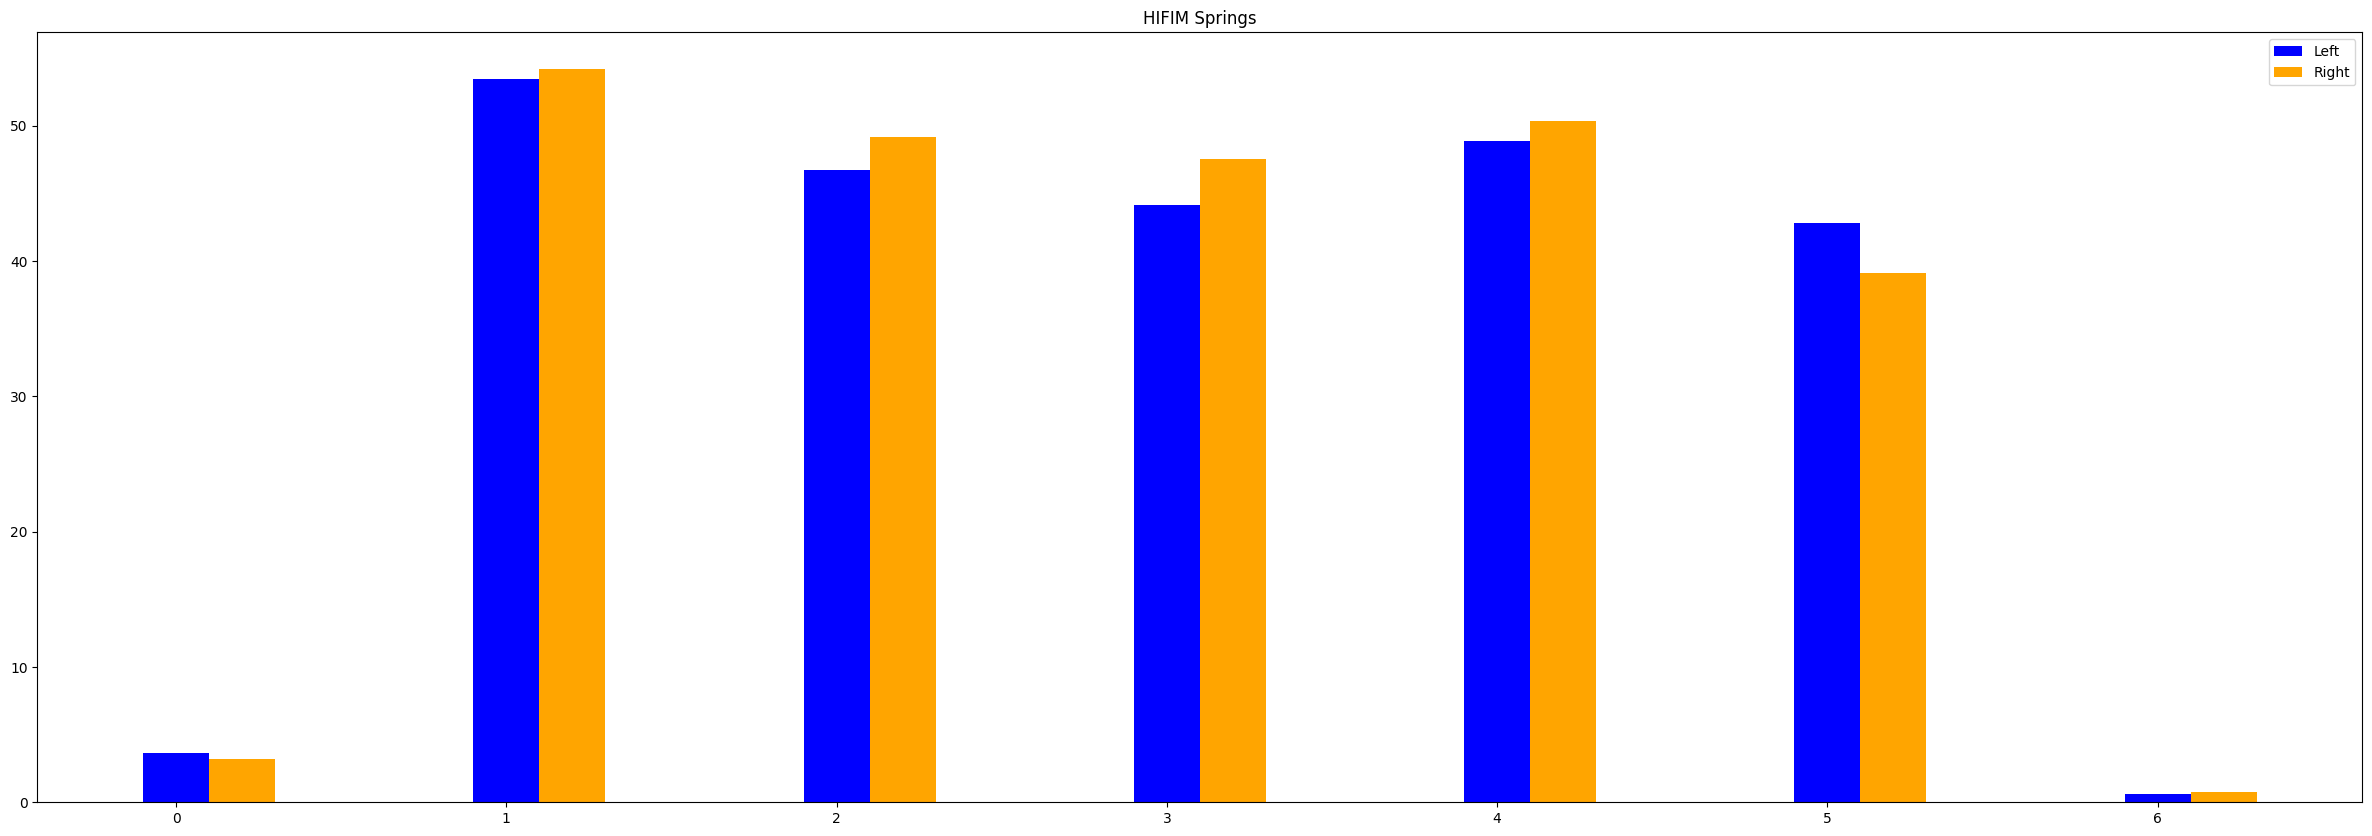

In [5]:

print()
print(f"Avg loading intenity: Left:{left_li_1_avg} Right: {right_li_1_avg}")
print()

# plot 
fig, ax = plt.subplots(1,1, figsize=(30, 10))

# time index
l_index_1 = [i for i in range(len(right_li_1))]
r_index_1 = [i + 0.2 for i in range(len(left_li_1))]

ax.bar(l_index_1, left_li_1,   0.2,  color="blue", label="Left" )
ax.bar(r_index_1, right_li_1,  0.2, color="orange", label="Right" )
ax.set_title("HIFIM Springs")
ax.legend()